# Plot LAS files #



### Import packages ###

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import welly
from welly import Well,Project
from striplog import Legend, Striplog, Lexicon, Component, Decor


### Import and plot geophysical logs from one LAS file with multiple parameters ###
LAS files can be downloaded from MGS Borehole Geophysical Database, or the URL to the file can be directly provided.

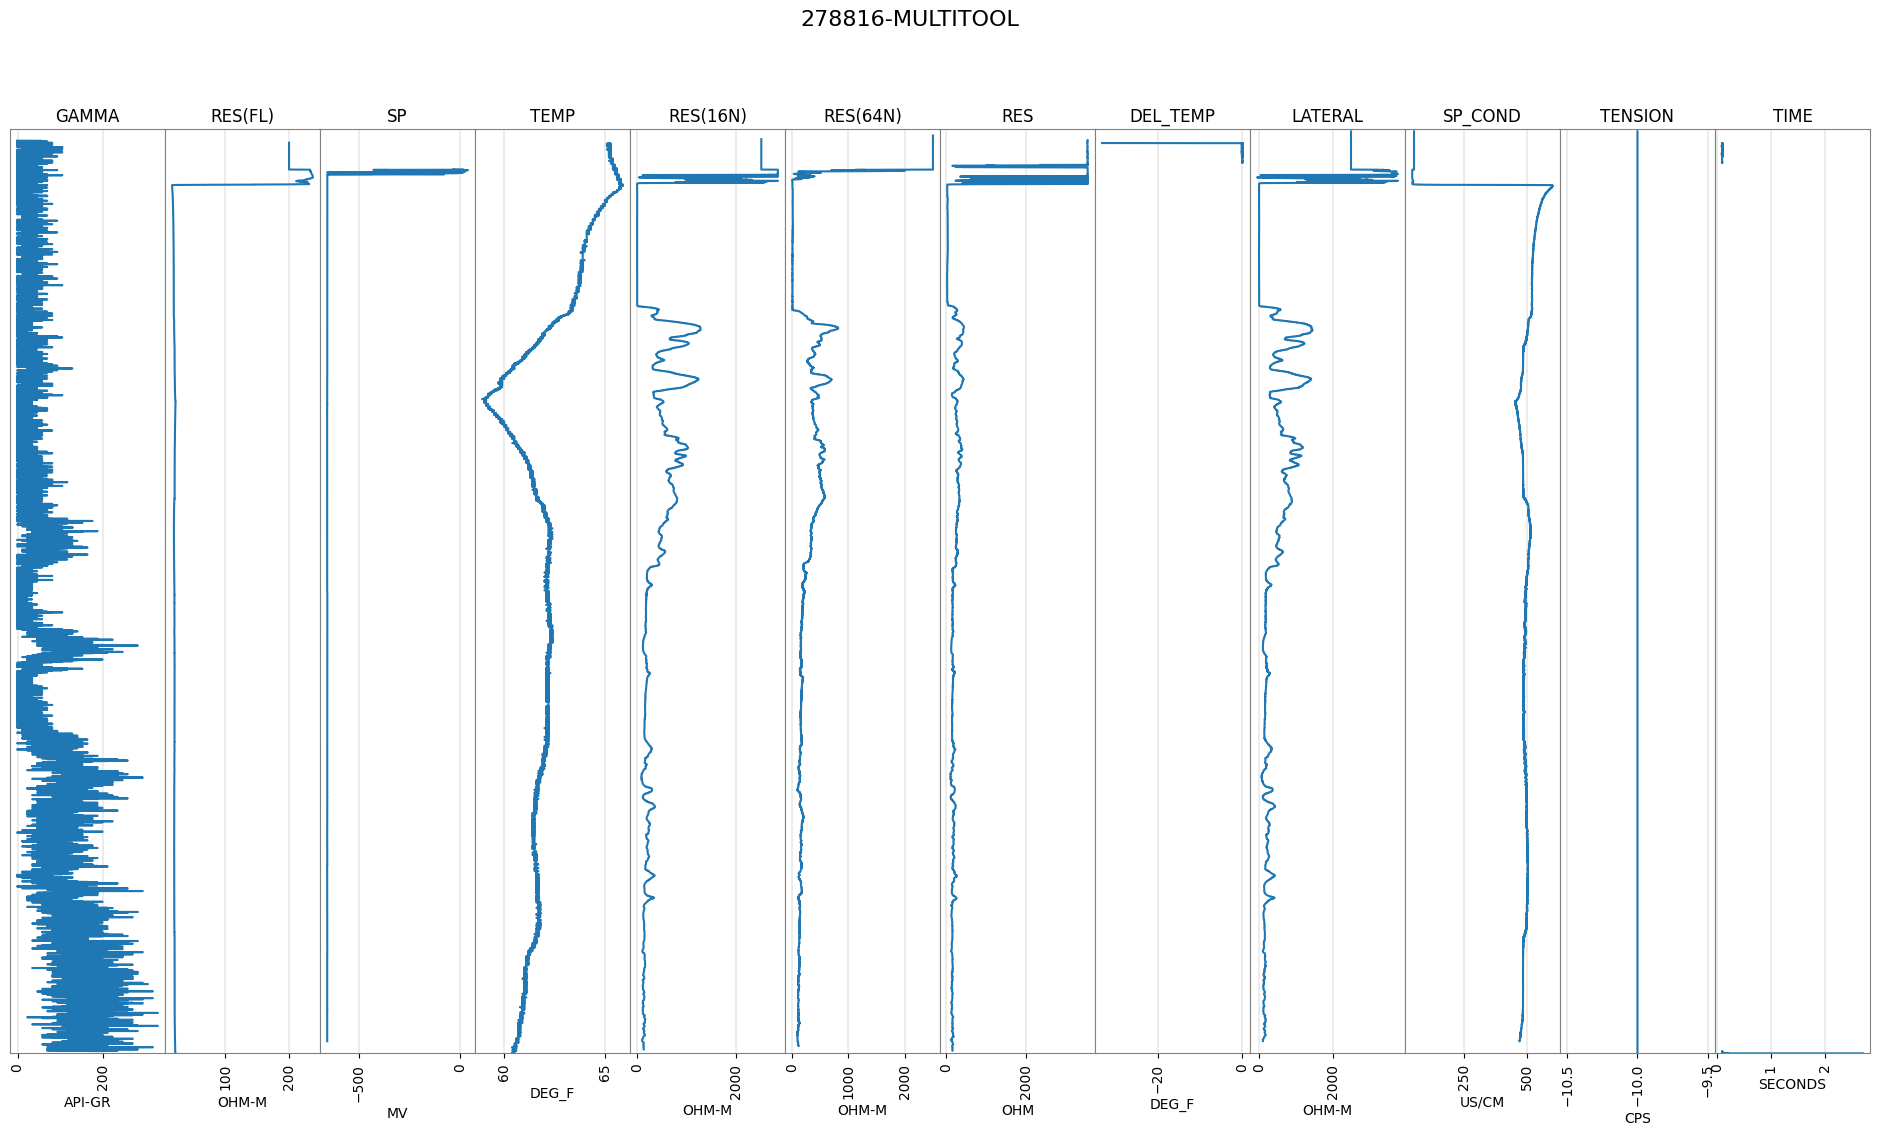

In [58]:
well = Well.from_las('wells/278816_CALIPER_8-15-2017.las') #import one well log from downloaded .las file
#well = Well.from_las('http://mgs-gispub.mngs.umn.edu/Geophysical_logs/Multitool/las/278816_MULTI_8-15-2017.las') #import from online MGS database
well.plot()              #plot all data in file

### Import and plot one striplog from stratigraphy csv file ###
In this example, I looked at the stratigraphy report PDF file and manually converted it to a csv. 
If doing a large number of logs, it would be worth automating this process.
The csv file format should have the following column headers:
- top: depth to the top of the unit
- base: depth to the base of the unit
- comp stratigraphy: for this example, use Minnesota Geological Survey four-letter unit codes. Including "comp" at the beginning of a column tells striplog to read in that column when defining component objects that can then be mapped to legend objects for plotting. To ignore a column, don't put "comp" in the name.
- comp lithology: sandstone, limestone, etc. See striplog documentation for a list of accepted terms.
- optional: secondary lithology


In [59]:
legend = Legend.from_csv(filename='wells/legend.csv') #create custom legend from csv
legend

Legend(Decor({'_colour': '#bfa743', 'hatch': '.', 'component': Component({'stratigraphy': 'quuu', 'lithology': 'glacial drift'}), 'width': None})
Decor({'_colour': '#00af89', 'hatch': 's', 'component': Component({'stratigraphy': 'opdc', 'lithology': 'dolostone'}), 'width': None})
Decor({'_colour': '#00baa0', 'hatch': 's', 'component': Component({'stratigraphy': 'opod', 'lithology': 'dolostone'}), 'width': None})
Decor({'_colour': '#e5f1d1', 'hatch': '..', 'component': Component({'stratigraphy': 'cjdn', 'lithology': 'sandstone'}), 'width': None})
Decor({'_colour': '#81aa72', 'hatch': '==', 'component': Component({'stratigraphy': 'cstl', 'lithology': 'siltstone'}), 'width': None})
Decor({'_colour': '#95c28f', 'hatch': '..', 'component': Component({'stratigraphy': 'ctcg', 'lithology': 'sandstone'}), 'width': None}))

C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


[Component({'stratigraphy': 'CTCG', 'lithology': 'sandstone'}), Component({'stratigraphy': 'OPOD', 'lithology': 'dolostone'}), Component({'stratigraphy': 'CJDN', 'lithology': 'sandstone'}), Component({'stratigraphy': 'QUUU', 'lithology': 'glacial drift'}), Component({'stratigraphy': 'OPDC', 'lithology': 'dolostone'}), Component({'stratigraphy': 'CSTL', 'lithology': 'siltstone'})]


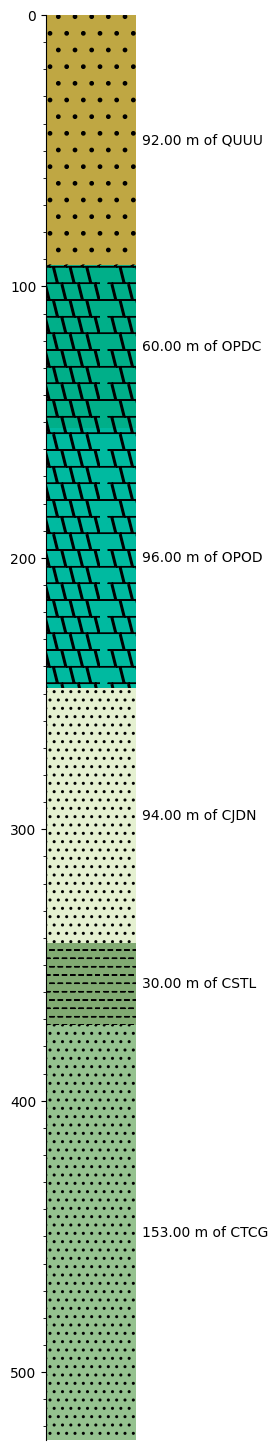

In [259]:
strip = Striplog.from_csv(filename='wells/278816_strat.csv') #load striplog from stratigraphy csv file - file is in feet depth below land surface
print(strip.components)  #show a list of the components of this log
strip.plot(legend=legend, label='{stratigraphy}') #plot using the custom legend from above - these are in FEET despite label being in meters

C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


[Component({'stratigraphy': 'CTCG', 'lithology': 'sandstone'}), Component({'stratigraphy': 'OPOD', 'lithology': 'dolostone'}), Component({'stratigraphy': 'CJDN', 'lithology': 'sandstone'}), Component({'stratigraphy': 'QUUU', 'lithology': 'glacial drift'}), Component({'stratigraphy': 'OPDC', 'lithology': 'dolostone'}), Component({'stratigraphy': 'CSTL', 'lithology': 'siltstone'})]


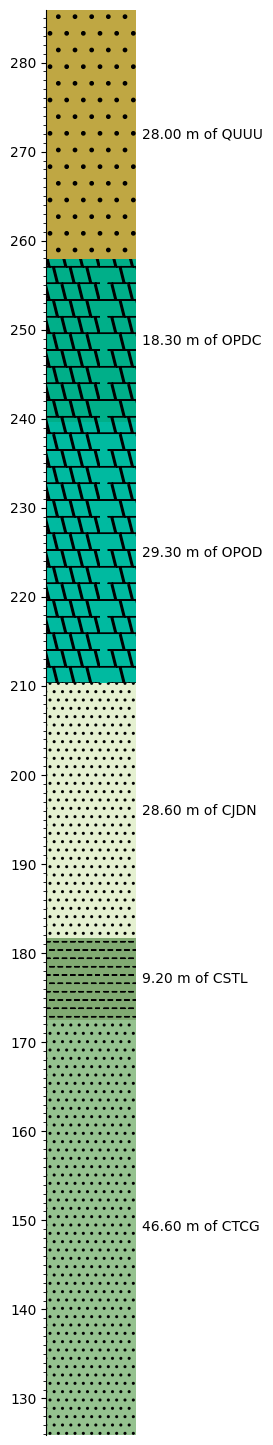

In [258]:
strip = Striplog.from_csv(filename='wells/278816_strat_masl.csv') #load striplog from stratigraphy csv file with elevations in meters above sea level instead of depth
print(strip.components)  #show a list of the components of this log
strip.plot(legend=legend, label='{stratigraphy}') #plot using the custom legend from above

### Plot striplog and borehole geophysical data from LAS files on one plot ###

In [65]:
project = Project.from_las('wells/278816*.las', index='existing')     # Load all las files in folder with specified well id in their name 
strip = Striplog.from_csv(filename='wells/278816_strat.csv') #load striplog from stratigraphy csv file
legend = Legend.from_csv(filename='wells/legend.csv') #import legend from csv

3it [00:01,  2.22it/s]
C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


<AxesSubplot:title={'center':'GAMMA'}, xlabel='API-GR'>

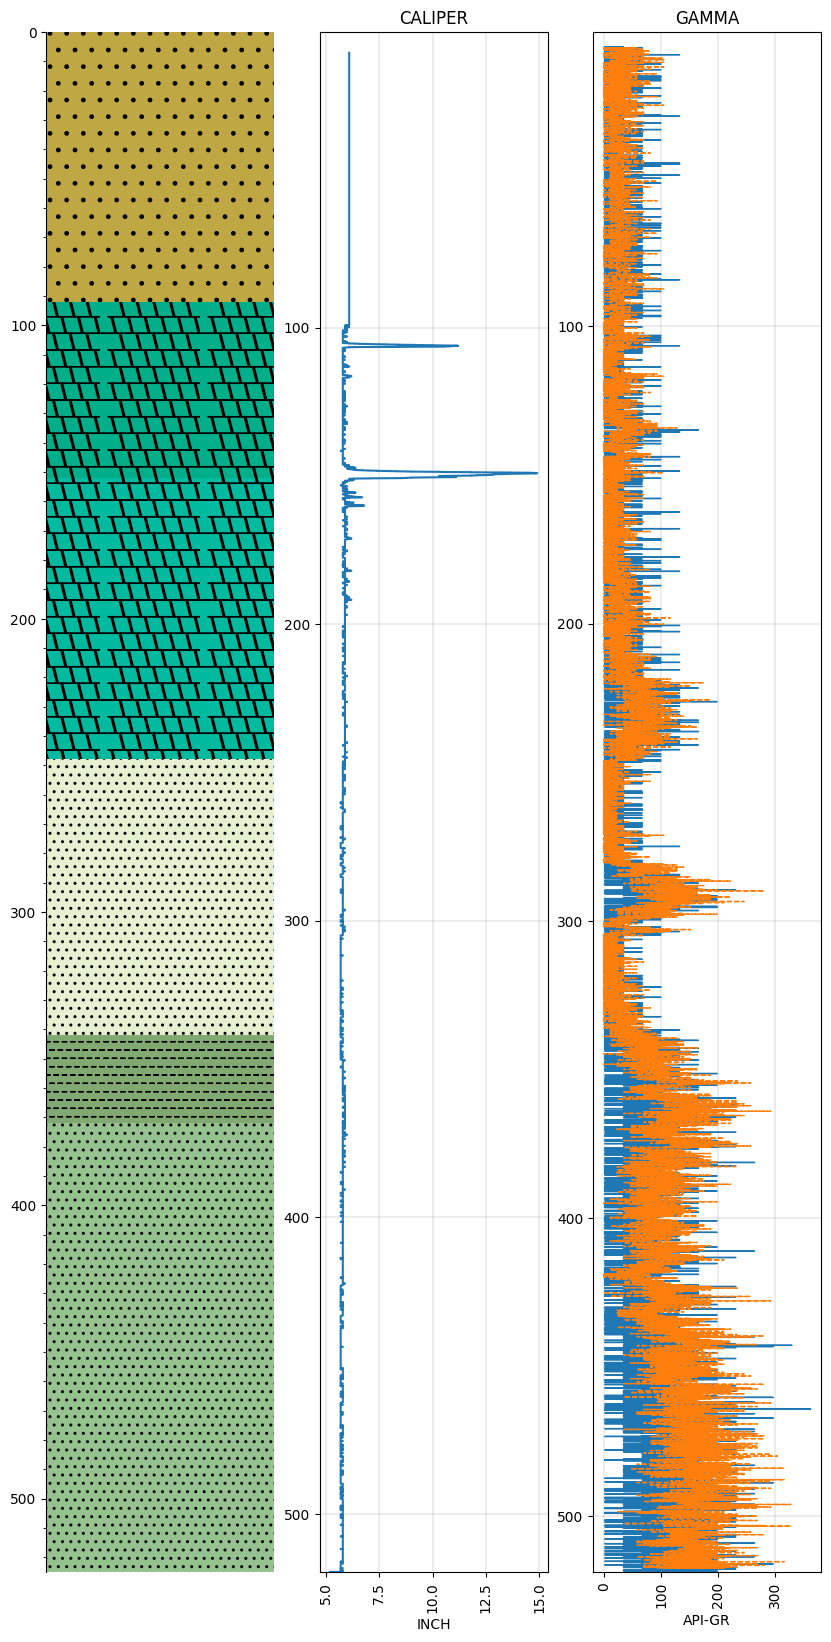

In [66]:
f, ax = plt.subplots(1,3, figsize=(10,20))   #make a figure object with several axes for subplots

strip.plot(ax=ax[0], legend=legend)  #plot the striplog

caliper = project[0].data['CALIPER']  #pull out data for just the caliper log
caliper.plot(ax=ax[1])                      #plot it
gamma1 = project[1].data['GAMMA']  #pull out data for just the gamma log
gamma1.plot(ax=ax[2], lw=1)                      #plot it
gamma2 = project[2].data['GAMMA']  #pull out data for just the gamma log from the multiprobe
gamma2.plot(ax=ax[2], lw=1, ls='--')                      #plot it on same axes as first gamma log

### Import temperature data & plot ###


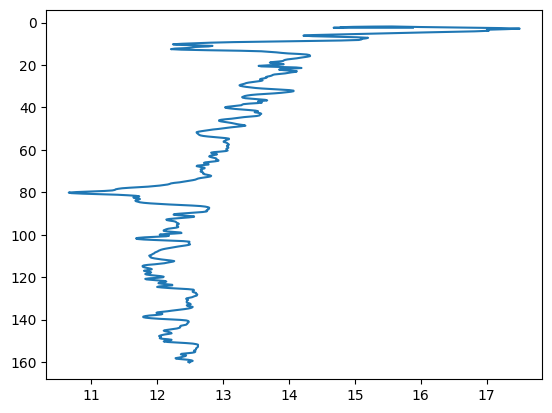

In [68]:
temp = pd.read_csv('wells/temp_example_single.csv')
plt.plot(temp.temp_C, temp.depth_m)
plt.gca().invert_yaxis()

### Plot striplog and borehole geophysical data and temperature on one plot ###
These wells are not colocated with the geophysical logs, so need to correct everything to be in terms of elevation rather than depth.

In [294]:
uwi = '278816'
project = Project.from_las('wells/'+uwi+'*.las', index='m')     # Load all las files in folder with specified well id in their name, and convert to meters
strip = Striplog.from_csv(filename='wells/'+uwi+'_strat.csv') #load striplog from stratigraphy csv file
stripm = Striplog.from_csv(filename='wells/'+uwi+'_strat_masl.csv') #load striplog from stratigraphy csv file
legend = Legend.from_csv(filename='wells/legend.csv') #import legend from csv
temp = pd.read_csv('wells/temp_example_single.csv')  #import temperature data for a single location and time
tempdif = pd.read_csv('wells/S3.csv')

3it [00:01,  2.25it/s]
C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)
C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


In [296]:
tempdif.columns

Index(['elevation_WGS84_m', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June',
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

Text(0.5, 1.0, 'DTS TEMP')

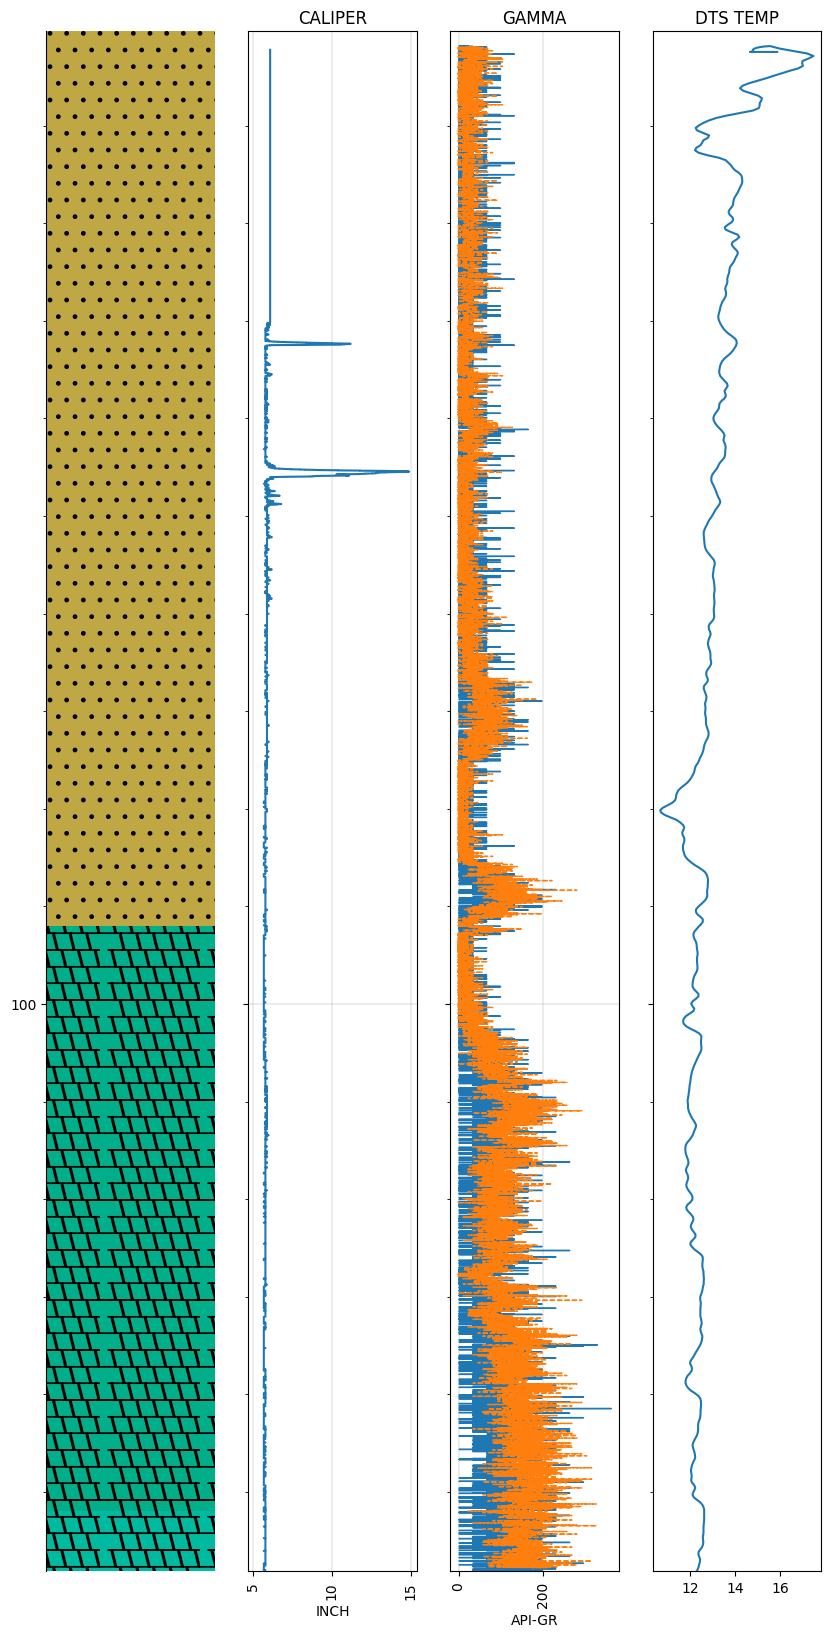

In [274]:
f, ax = plt.subplots(1,4, figsize=(10,20), sharey=True)   #make a figure object with several axes for subplots, with the same y axis scale

strip.plot(ax=ax[0], legend=legend)  #plot the striplog - but it will be in the wrong units

caliper = project[0].data['CALIPER']  #pull out data for just the caliper log
caliper.plot(ax=ax[1])                      #plot it
gamma1 = project[1].data['GAMMA']  #pull out data for just the gamma log
gamma1.plot(ax=ax[2], lw=1)                      #plot it
gamma2 = project[2].data['GAMMA']  #pull out data for just the gamma log from the multiprobe
gamma2.plot(ax=ax[2], lw=1, ls='--')                      #plot it on same axes as first gamma log
#strip.plot(ax=ax[3], style='tops', field='stratigraphy')  #plot just the layer boundaries overlaid on temp
ax[3].plot(temp.temp_C, temp.depth_m)                     #plot the temperature data from DTS 
ax[3].set_title('DTS TEMP')

In [275]:
#Convert from depths to elevations

well = project[0]   #pull out the first log
egl = well.header[well.header.mnemonic == 'EGL'].value.item() #get the value of the elevation above ground level from the header
egl = float(egl[0:-2]) #convert to float (drop last two characters first) 
egl = egl*0.3048 #convert feet to meters

caliper = project[0].data['CALIPER'].df  #pull out data for just the caliper log as a pandas dataframe
caliper['ELEV'] = egl - caliper.index     #subtract depth (which is the index) from ground surface elevation (egl) to get elevation
caliper.set_index('ELEV', inplace=True)   #replace the index (currently depth) with elevation

gamma = project[2].data['GAMMA'].df  #pull out data for just the gamma log from the multiprobe as a pandas dataframe
gamma['ELEV'] = egl - gamma.index     #subtract depth (which is the index) from ground surface elevation (egl) to get elevation
gamma.set_index('ELEV', inplace=True)  #replace the index (currently depth) with elevation

In [288]:
temdif

,elevation_WGS84_m,1,2,3,4,5,6,7,8,9,10,11,12
0,127.45,0.16,0.09,0.48,1.70,1.66,2.12,2.79,2.11,3.42,0.99,1.11,1.26
1,127.71,0.16,0.11,0.46,1.64,1.64,2.11,2.76,2.08,3.39,1.01,1.09,1.22
2,127.96,0.19,0.11,0.46,1.67,1.68,2.12,2.79,2.12,3.42,1.01,1.11,1.23
3,128.22,0.19,0.09,0.47,1.74,1.73,2.15,2.84,2.20,3.50,1.01,1.16,1.29
4,128.47,0.16,0.07,0.49,1.82,1.78,2.17,2.88,2.21,3.52,1.03,1.19,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,285.58,0.13,0.09,0.12,0.17,0.13,0.21,0.13,0.22,0.19,0.44,0.24,0.13
630,285.64,0.13,0.09,0.10,0.18,0.13,0.18,0.14,0.21,0.19,0.46,0.25,0.12
631,285.71,0.15,0.08,0.09,0.21,0.16,0.22,0.17,0.20,0.29,0.51,0.24,0.11
632,285.77,0.15,0.09,0.11,0.23,0.19,0.28,0.19,0.21,0.36,0.57,0.25,0.12


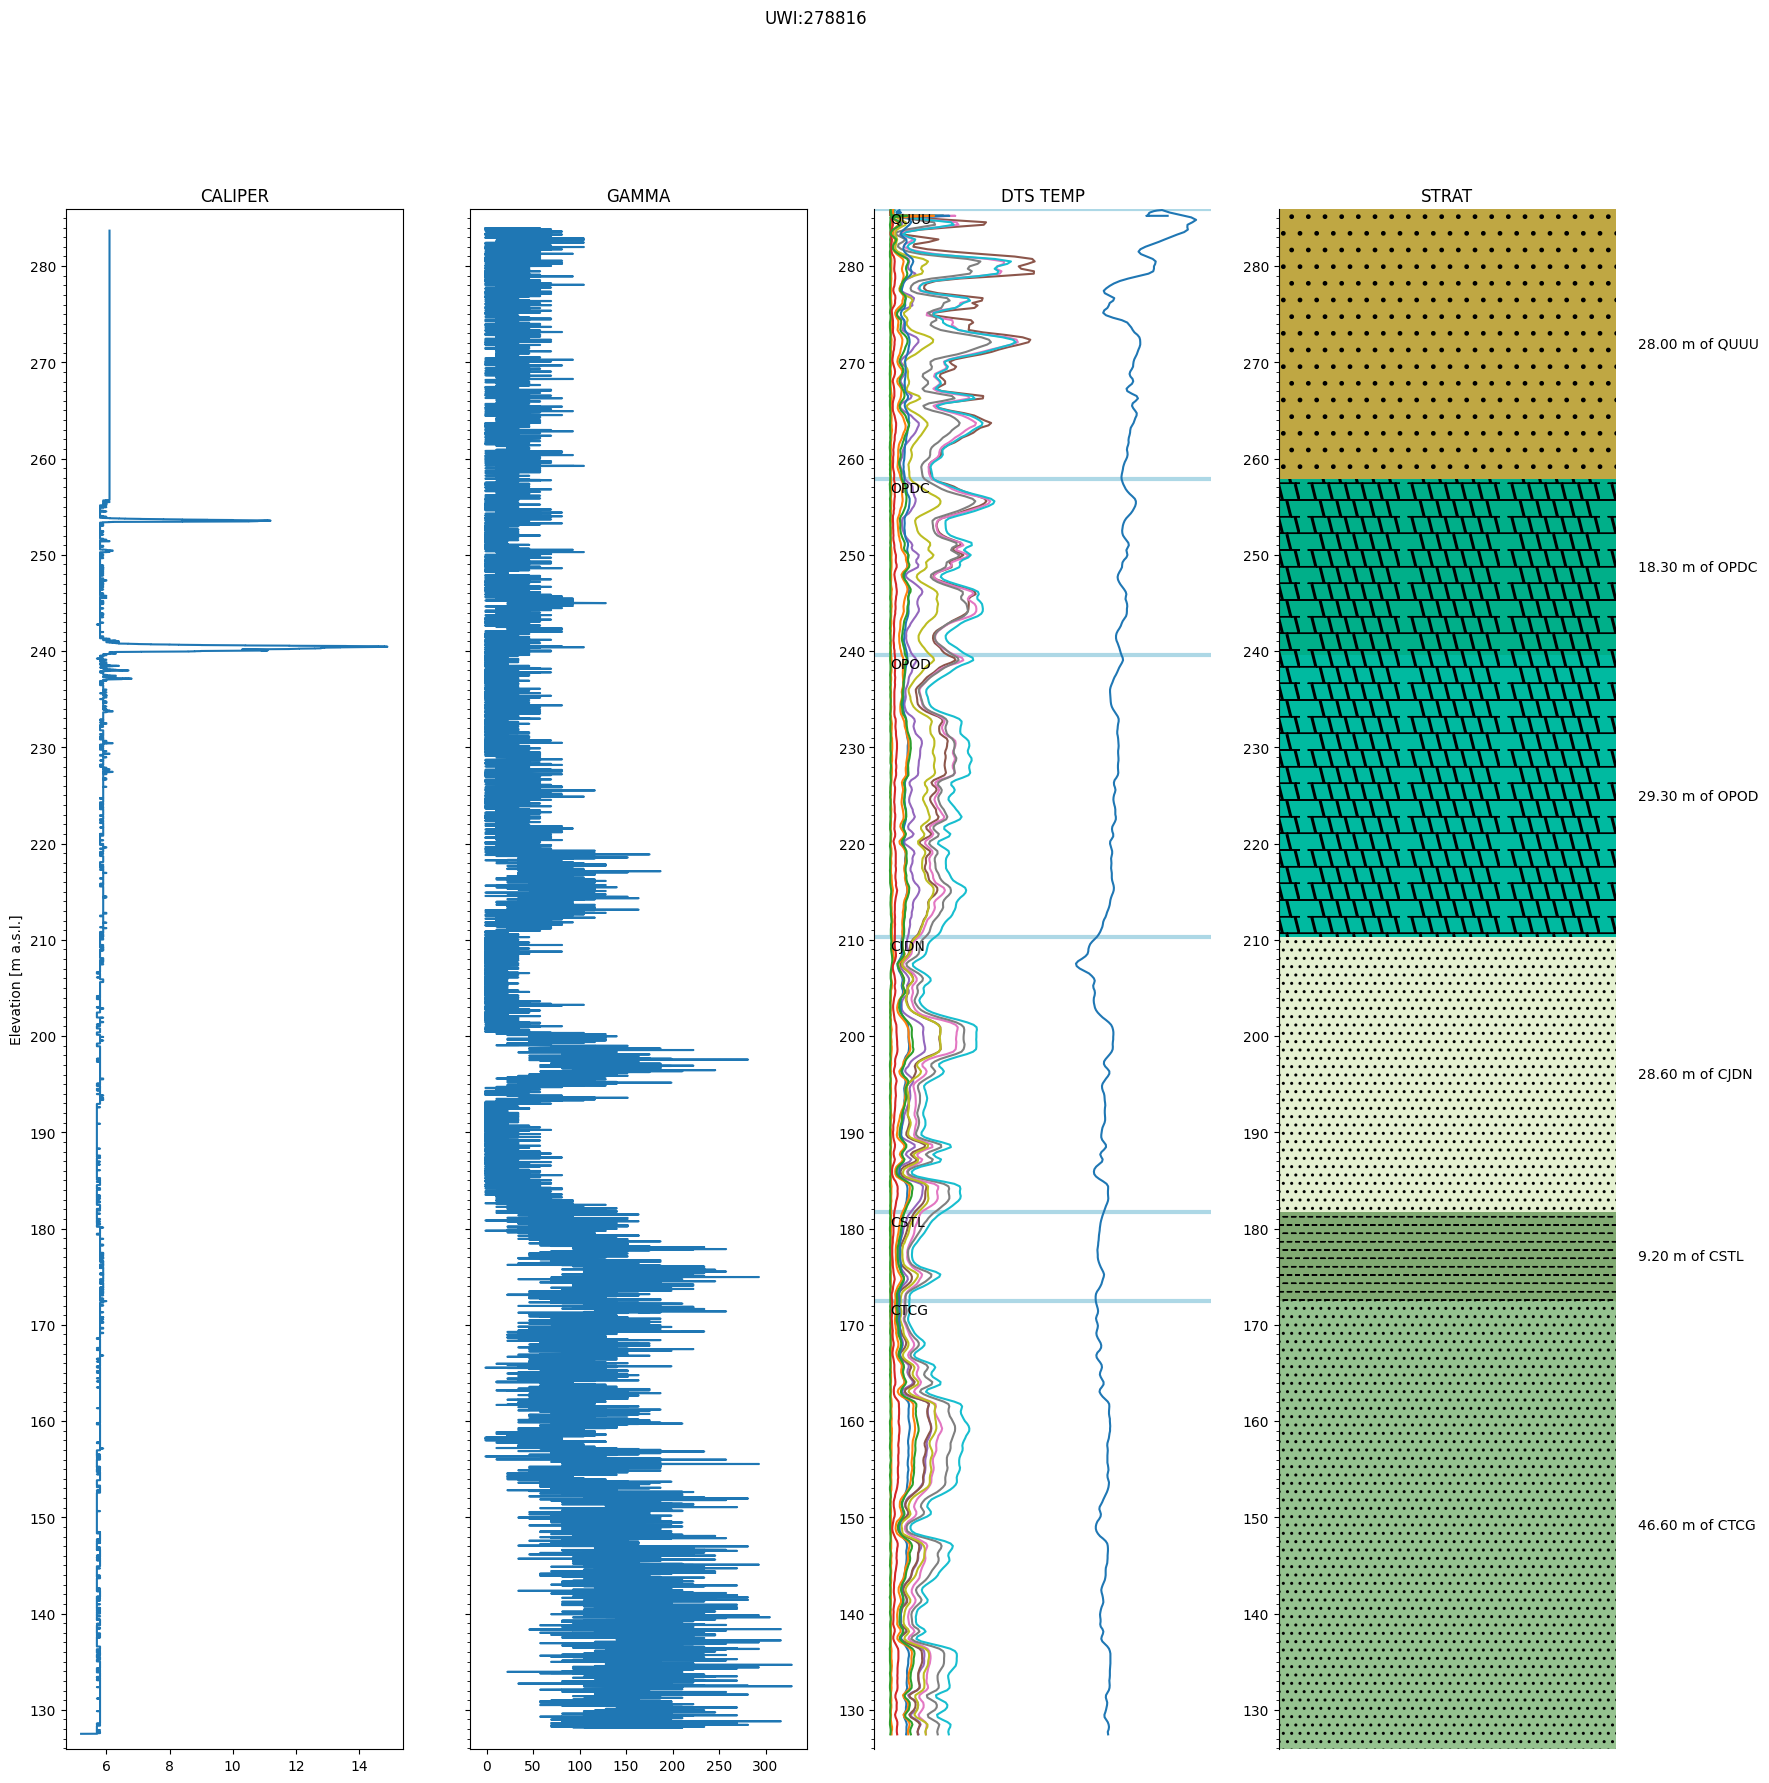

In [299]:
f, ax = plt.subplots(1,4, figsize=(20,20), sharey=True)   #make a figure object with several axes for subplots, with the same y axis scale
plt.suptitle('UWI:'+uwi)
ax[0].set_ylabel('Elevation [m a.s.l.]')
ax[0].plot(caliper.CALIPER,caliper.index)
#stripm.plot(ax=ax[0], style='tops', field='stratigraphy')  #plot just the layer boundaries overlaid 
ax[0].set_title('CALIPER')
ax[1].plot(gamma.GAMMA,gamma.index)
#stripm.plot(ax=ax[1], style='tops', field='stratigraphy')  #plot just the layer boundaries overlaid 
ax[1].set_title('GAMMA')
ax[2].plot(temp.temp_C, temp.elevation_WGS84_m)
stripm.plot(ax=ax[2], style='tops', field='stratigraphy')  #plot just the layer boundaries overlaid 
ax[2].set_title('DTS TEMP')
stripm.plot(ax=ax[3], legend=legend, label='{stratigraphy}')  #plot the striplog
ax[3].set_title('STRAT')

for month in ['Jan', 'Feb', 'Mar', 'April', 'May', 'June',
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']:
    
    ax[2].plot(tempdif[month], tempdif.elevation_WGS84_m)